In [7]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date and time handling
from datetime import datetime

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv('cleaned_REF.csv')
df

Unnamed: 0    REF_U_1       REF_U_2  REF_U_3  REF_tau_11  REF_tau_12  \
0              0   0.183148  5.524527e-08      0.0    0.008608   -0.000008   
1              1   0.554677  5.522239e-07      0.0    0.057279   -0.000092   
2              2   0.936817  1.724616e-06      0.0    0.153380   -0.000350   
3              3   1.329845  3.472650e-06      0.0    0.312959   -0.001098   
4              4   1.734088  5.539989e-06      0.0    0.507273   -0.002107   
...          ...        ...           ...      ...         ...         ...   
1553         185  60.170067  5.664020e-02      0.0   14.968957   -4.315332   
1554         186  60.553772  5.919544e-02      0.0   14.507311   -4.182678   
1555         187  60.942444  6.188760e-02      0.0   14.014689   -4.042442   
1556         188  61.335743  6.471685e-02      0.0   13.497219   -3.894517   
1557         189  61.733710  6.766377e-02      0.0   12.961462   -3.740061   

      REF_tau_13    REF_tau_22  REF_tau_23  REF_tau_33  ...  REF_tauplus_22  \
0            0.0  1.508704e-07         0.0    0.003648  ...    1.648931e-08   
1            0.0  3.399372e-06         0.0    0.023670  ...    3.715329e-07   
2            0.0  1.554829e-05         0.0    0.061977  ...    1.699343e-06   
3            0.0  7.115068e-05         0.0    0.121662  ...    7.776382e-06   
4            0.0  1.497585e-04         0.0    0.193131  ...    1.636779e-05   
...          ...           ...         ...         ...  ...             ...   
1553         0.0  6.584633e+00         0.0    8.829160  ...    9.371833e-01   
1554         0.0  6.389991e+00         0.0    8.544334  ...    9.094802e-01   
1555         0.0  6.189920e+00         0.0    8.252177  ...    8.810044e-01   
1556         0.0  5.986698e+00         0.0    7.937406  ...    8.520800e-01   
1557         0.0  5.775925e+00         0.0    7.595922  ...    8.220808e-01   

      REF_tauplus_23  REF_tauplus_31  REF_tauplus_32  REF_tauplus_33  \
0                0.0             0.0             0.0        0.000399   
1                0.0             0.0             0.0        0.002587   
2                0.0             0.0             0.0        0.006774   
3                0.0             0.0             0.0        0.013297   
4                0.0             0.0             0.0        0.021108   
...              ...             ...             ...             ...   
1553             0.0             0.0             0.0        1.256644   
1554             0.0             0.0             0.0        1.216105   
1555             0.0             0.0             0.0        1.174523   
1556             0.0             0.0             0.0        1.129722   
1557             0.0             0.0             0.0        1.081119   

      REF_Uplus_1   REF_Uplus_2  REF_Uplus_3   REF_yplus     Case  
0        0.060548  1.826393e-08          0.0    0.060548  fp_1000  
1        0.183375  1.825637e-07          0.0    0.183376  fp_1000  
2        0.309709  5.701532e-07          0.0    0.309713  fp_1000  
3        0.439643  1.148049e-06          0.0    0.439660  fp_1000  
4        0.573285  1.831505e-06          0.0    0.573321  fp_1000  
...           ...           ...          ...         ...      ...  
1553    22.700058  2.136837e-02          0.0  687.725600  fp_4060  
1554    22.844818  2.233237e-02          0.0  707.485000  fp_4060  
1555    22.991450  2.334802e-02          0.0  727.809000  fp_4060  
1556    23.139828  2.441540e-02          0.0  748.713900  fp_4060  
1557    23.289967  2.552717e-02          0.0  770.216200  fp_4060  

[1558 rows x 49 columns]

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558 entries, 0 to 1557
Data columns (total 49 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1558 non-null   int64  
 1   REF_U_1         1558 non-null   float64
 2   REF_U_2         1558 non-null   float64
 3   REF_U_3         1558 non-null   float64
 4   REF_tau_11      1558 non-null   float64
 5   REF_tau_12      1558 non-null   float64
 6   REF_tau_13      1558 non-null   float64
 7   REF_tau_22      1558 non-null   float64
 8   REF_tau_23      1558 non-null   float64
 9   REF_tau_33      1558 non-null   float64
 10  REF_k           1558 non-null   float64
 11  REF_a_11        1558 non-null   float64
 12  REF_a_12        1558 non-null   float64
 13  REF_a_13        1558 non-null   float64
 14  REF_a_22        1558 non-null   float64
 15  REF_a_23        1558 non-null   float64
 16  REF_a_33        1558 non-null   float64
 17  REF_b_11        1558 non-null   f

In [10]:
df['REF_k'].unique()

array([6.12816000e-03, 4.04760600e-02, 1.07685894e-01, ...,
       1.42283940e+01, 1.37106620e+01, 1.31666550e+01])

In [11]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [12]:
# Select Features and Target
target = "REF_k"
features = ["REF_U_1", "REF_U_2", "REF_U_3", "REF_tau_11", "REF_tau_12", "REF_tau_22", 
            "REF_gradU_11", "REF_gradU_12", "REF_yplus", "REF_a_11", "REF_b_11", "REF_divtau_1"]

In [13]:
X = df[features]
y = df[target]

In [14]:
# Data Preprocessing (Handling missing values, Scaling)
X.fillna(X.mean(), inplace=True)

In [15]:
# Outlier Removal using IQR
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
IQR

REF_U_1             25.736366
REF_U_2              0.013897
REF_U_3              0.000000
REF_tau_11          23.489000
REF_tau_12           3.749687
REF_tau_22           8.305222
REF_gradU_11        18.589985
REF_gradU_12    319589.089500
REF_yplus          136.924035
REF_a_11            15.866277
REF_b_11             0.255317
REF_divtau_1     34776.386910
dtype: float64

In [16]:
X = X[~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)]
y = y.loc[X.index]

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
# Normalization
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [26]:
X_train

array([[9.71592814e-02, 1.52222221e-03, 0.00000000e+00, ...,
        7.23653414e-02, 8.29344142e-01, 7.12520418e-01],
       [5.63801690e-03, 2.66676173e-06, 0.00000000e+00, ...,
        4.85957450e-04, 5.88187319e-01, 9.73903631e-01],
       [7.54474636e-01, 9.09152186e-02, 0.00000000e+00, ...,
        3.62070772e-01, 2.34148107e-01, 9.72691500e-01],
       ...,
       [9.42698862e-01, 4.81686415e-01, 0.00000000e+00, ...,
        2.26404790e-01, 9.10205292e-02, 9.82905353e-01],
       [2.58594312e-01, 2.39668926e-03, 0.00000000e+00, ...,
        4.72827228e-01, 9.92125022e-01, 4.22024749e-02],
       [9.25064989e-01, 4.17858446e-01, 0.00000000e+00, ...,
        2.38569208e-01, 1.05779785e-01, 9.81820195e-01]])

In [22]:
X_test

array([[0.81325646, 0.14305449, 0.        , ..., 0.30126795, 0.16151828,
        0.97852928],
       [0.67337588, 0.04035657, 0.        , ..., 0.57436484, 0.48795919,
        0.9185529 ],
       [0.57748646, 0.02489278, 0.        , ..., 0.88577822, 0.81677902,
        0.59148476],
       ...,
       [0.65817495, 0.10241895, 0.        , ..., 0.83071615, 0.71287841,
        0.72575073],
       [0.93594811, 0.48491317, 0.        , ..., 0.22899153, 0.09256314,
        0.98308212],
       [0.83497109, 0.21373134, 0.        , ..., 0.29031338, 0.16103773,
        0.97991645]])

In [28]:
# Exploratory Data Analysis (EDA)
print("Dataset Summary:\n", df.describe())

Dataset Summary:
         Unnamed: 0      REF_U_1      REF_U_2  REF_U_3   REF_tau_11  \
count  1558.000000  1558.000000  1558.000000   1558.0  1558.000000   
mean     86.799743    34.677200     0.011639      0.0    30.907064   
std      51.193385    16.994025     0.018298      0.0    16.754787   
min       0.000000     0.140640     0.000000      0.0     0.005594   
25%      43.000000    22.013761     0.000356      0.0    20.131439   
50%      86.000000    39.060322     0.002923      0.0    28.485391   
75%     129.000000    47.750127     0.014252      0.0    43.620439   
max     189.000000    61.733710     0.104780      0.0    67.425450   

        REF_tau_12  REF_tau_13    REF_tau_22  REF_tau_23   REF_tau_33  ...  \
count  1558.000000      1558.0  1.558000e+03      1558.0  1558.000000  ...   
mean     -4.845171         0.0  5.563338e+00         0.0    11.459391  ...   
std       2.593269         0.0  3.891112e+00         0.0     5.143109  ...   
min      -8.248393         0.0  7.44475

In [29]:
# Enhanced Data Visualization
sns.set_style("whitegrid")

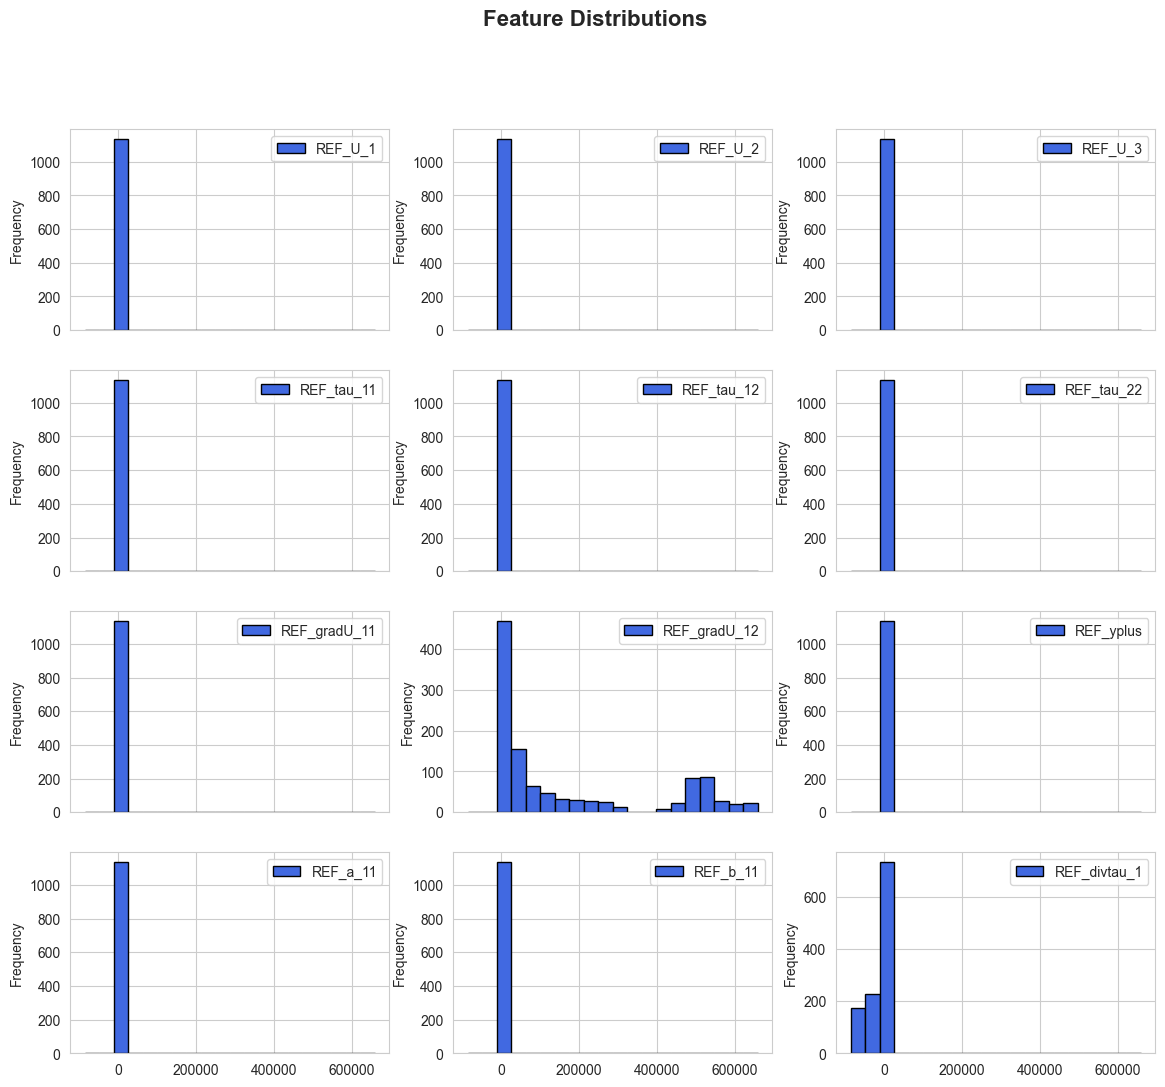

In [30]:
# Histogram of features
X.plot(kind='hist', subplots=True, layout=(4,3), figsize=(14, 12), bins=20, color='royalblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16, fontweight='bold')
plt.show()

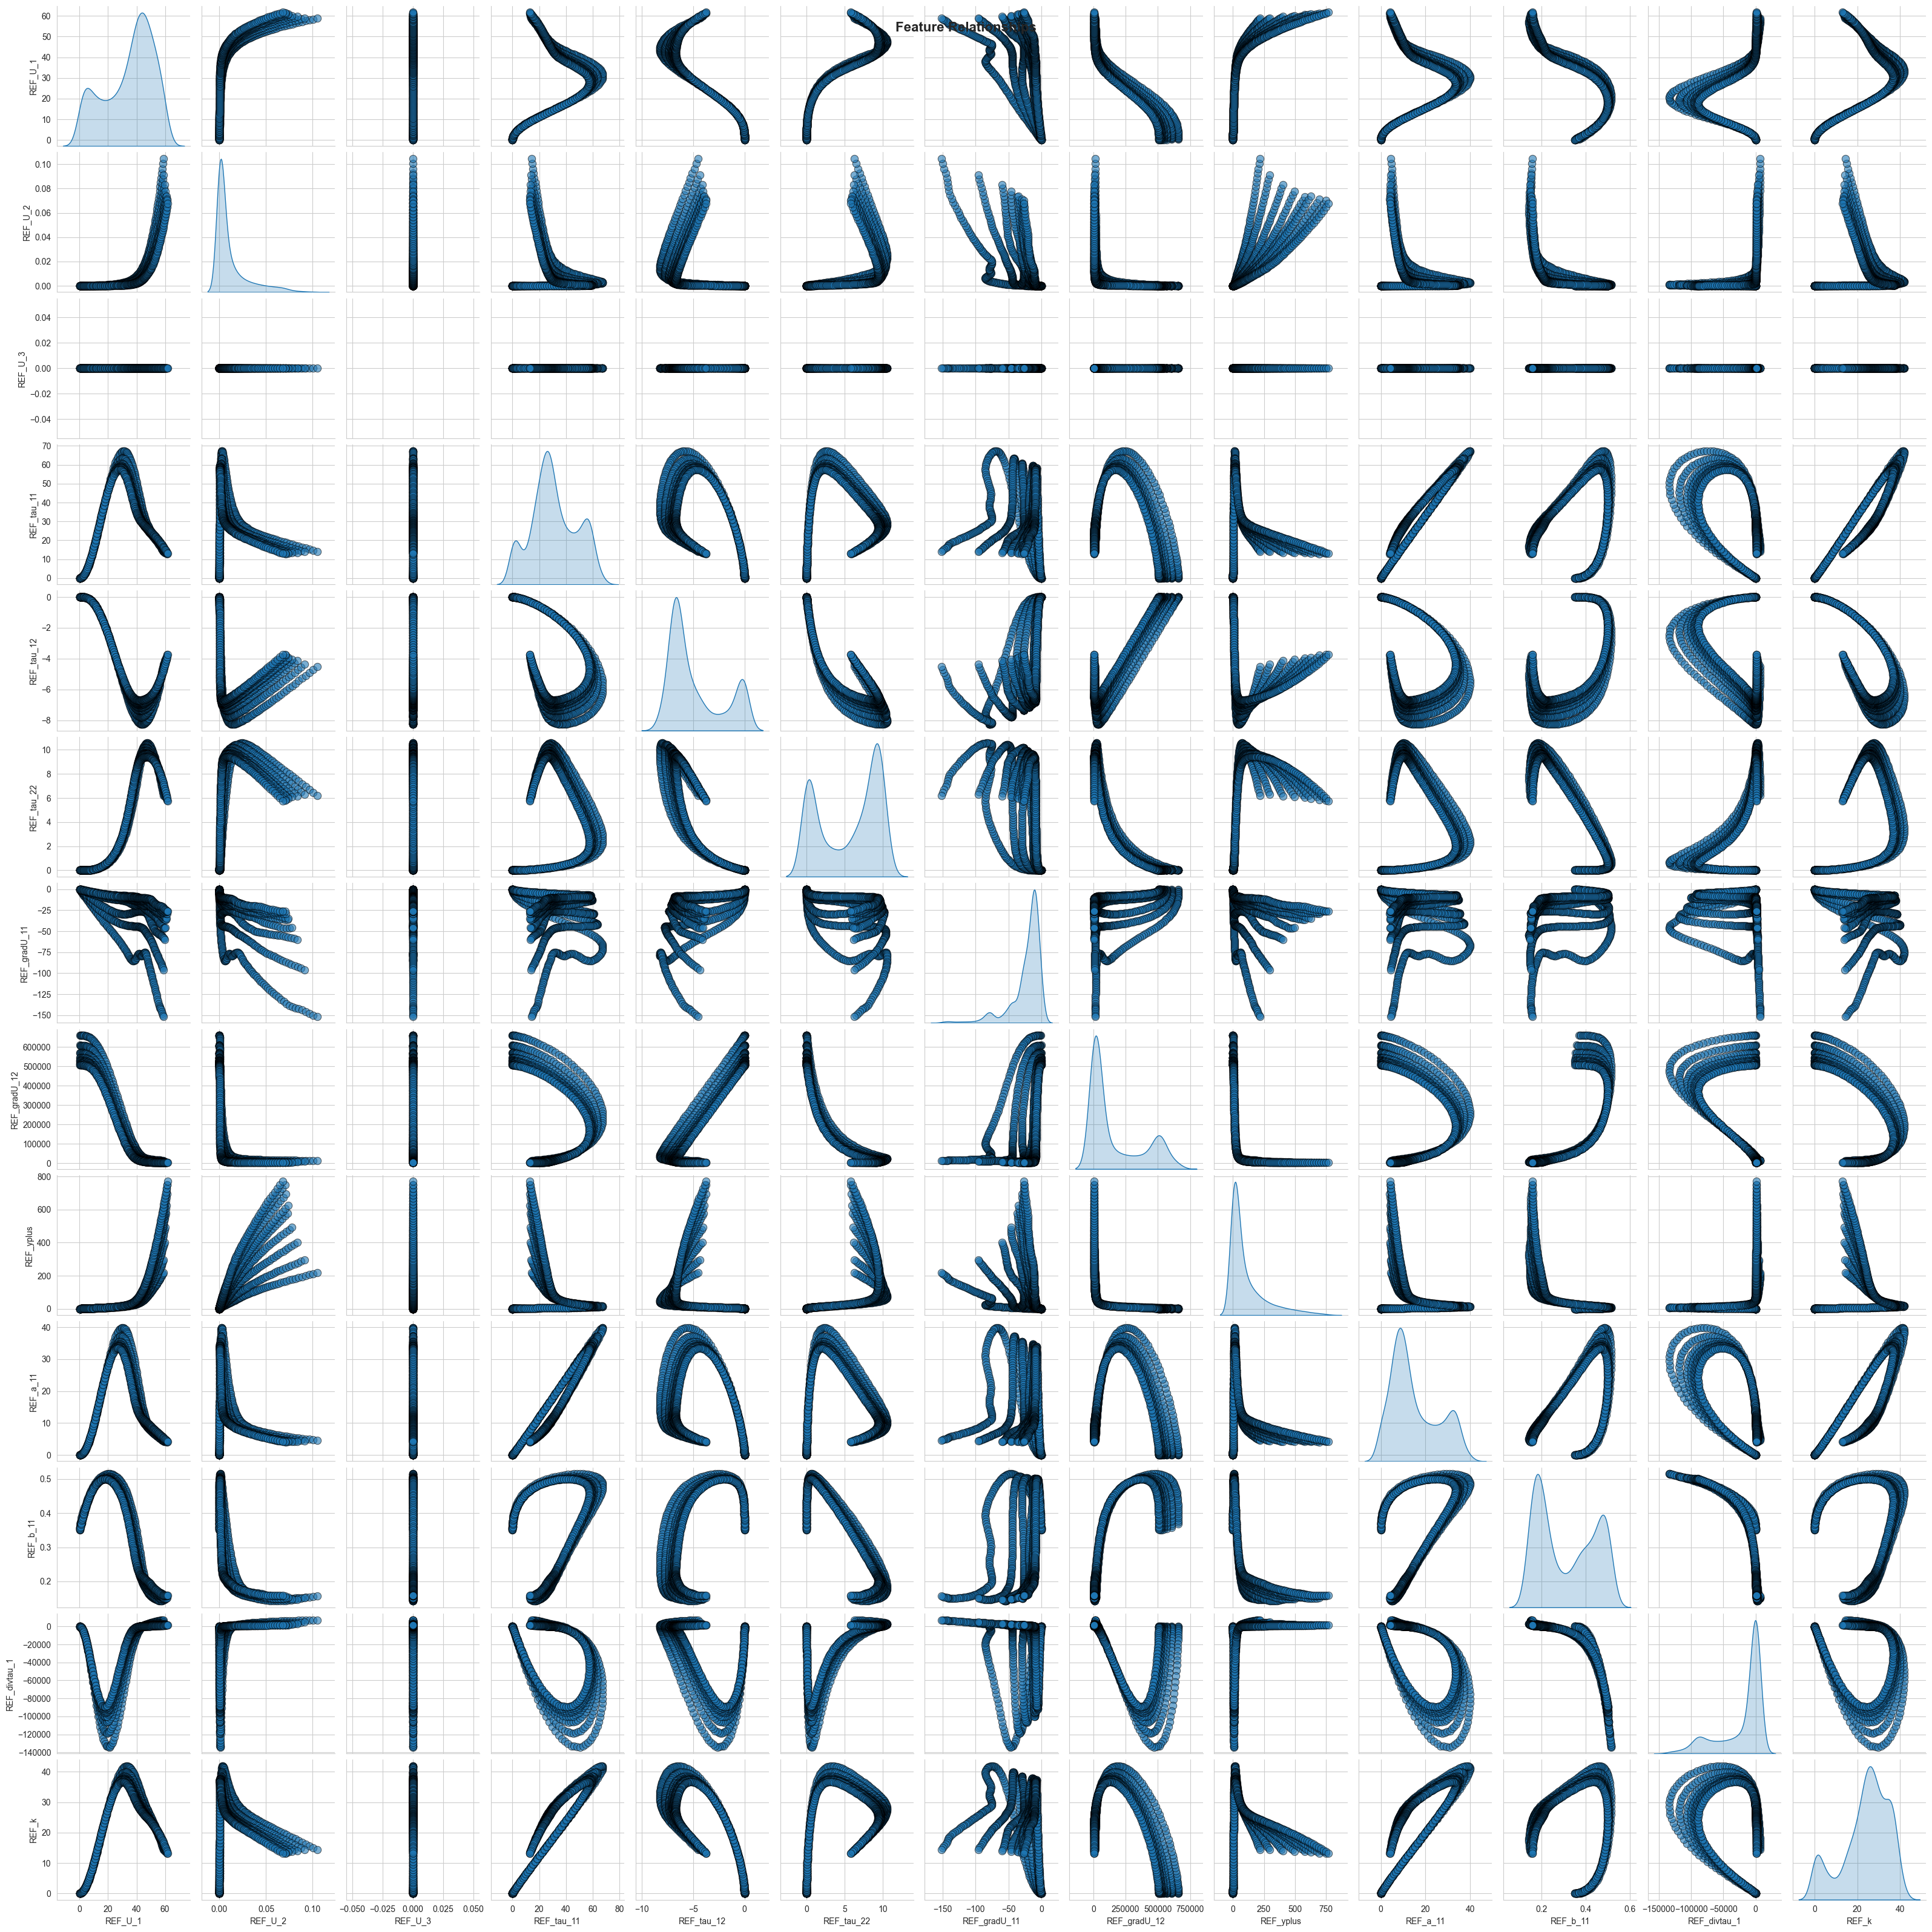

In [31]:
# Pairplot to check relationships
sns.pairplot(df[features + [target]], diag_kind='kde', plot_kws={'alpha':0.6, 's':80, 'edgecolor':'k'})
plt.suptitle("Feature Relationships", fontsize=16, fontweight='bold')
plt.show()

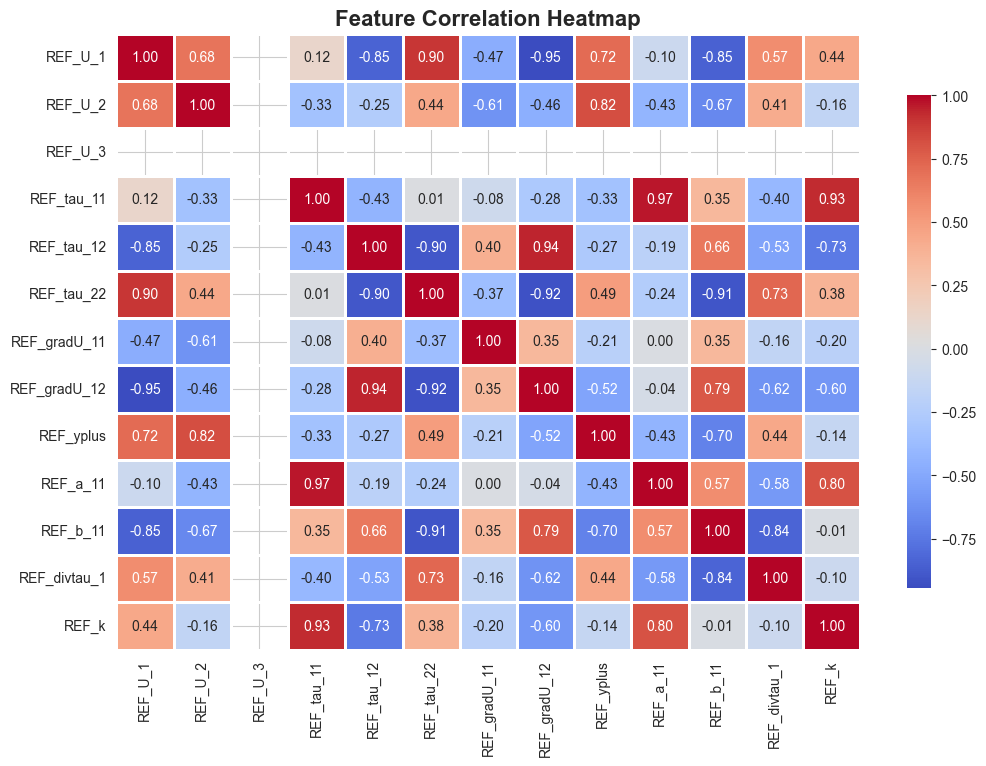

In [32]:
# Feature Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[features + [target]].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=1, cbar_kws={"shrink": .8})
plt.title("Feature Correlation Heatmap", fontsize=16, fontweight='bold')
plt.show()

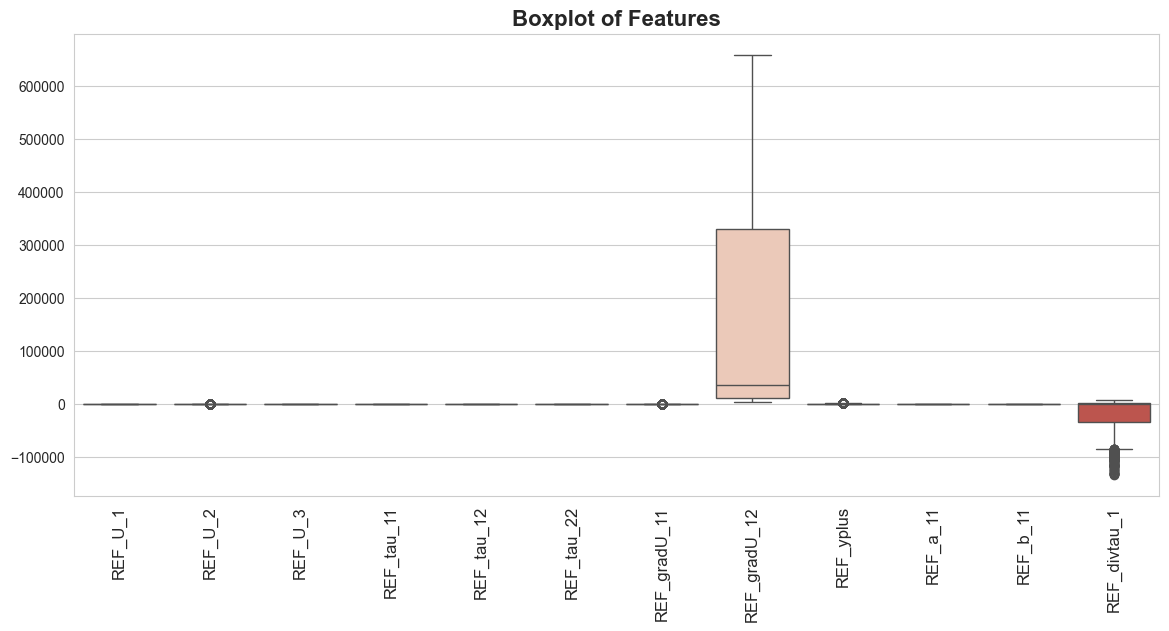

In [33]:
# Boxplot for Outlier Detection
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[features], palette="coolwarm")
plt.xticks(rotation=90, fontsize=12)
plt.title("Boxplot of Features", fontsize=16, fontweight='bold')
plt.show()

In [34]:
# Model Training and Evaluation
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression(),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5)
}

In [35]:
best_model = None
best_rmse = float("inf")
results = {}

In [36]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {"RMSE": rmse, "R²": r2}
    print(f"{name} Performance:\nRMSE: {rmse:.4f}, R²: {r2:.4f}\n")
    
    if rmse < best_rmse:
        best_rmse = rmse
        best_model = model


Random Forest Performance:
RMSE: 0.1484, R²: 0.9998

Gradient Boosting Performance:
RMSE: 0.2196, R²: 0.9996

Linear Regression Performance:
RMSE: 0.0000, R²: 1.0000

Support Vector Regressor Performance:
RMSE: 0.3763, R²: 0.9989

K-Nearest Neighbors Performance:
RMSE: 0.1664, R²: 0.9998



In [37]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [38]:
rf_pred = rf_model.predict(X_test)
rf_pred

array([2.67295915e+01, 3.33636151e+01, 3.77643794e+01, 2.19931522e+01,
       2.85483504e+01, 2.71639622e+01, 3.43279112e+01, 3.96356337e+01,
       3.28931662e+01, 2.24000761e+01, 2.99734433e+01, 3.24640938e+01,
       2.57079985e+01, 2.72438695e+01, 2.56657446e+01, 3.02331633e+01,
       2.12639072e+01, 2.24658343e+01, 3.34571784e+01, 3.74728288e+01,
       2.86942611e+01, 1.52013990e+01, 2.37866155e+01, 3.84226821e+01,
       3.84839783e+01, 9.33404899e+00, 3.08140452e+01, 3.77331821e+01,
       3.38989169e+01, 2.97952883e+01, 2.64282310e+01, 1.81540063e+00,
       3.07151834e+01, 1.51822227e-01, 1.13173104e+00, 7.31086238e-03,
       2.47577853e+01, 2.12623484e+01, 2.94556901e+01, 3.61467501e+01,
       3.65132078e+01, 3.19423931e+01, 3.61099351e+01, 3.44326100e+01,
       3.28642126e+01, 1.23959358e+01, 3.18128792e+01, 1.20150052e+01,
       3.11617998e+01, 3.67926297e+01, 3.23792823e+01, 3.15652509e+01,
       4.65234617e+00, 2.48662474e+01, 2.49467996e+01, 3.77614610e+01,
      